#Importing Libraries

In [ ]:
!pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.3.4
    Uninstalling rich-13.3.4:
      Successfully uninstalled rich-13.3.4
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [ ]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as mano

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from skimpy import skim

In [ ]:
df = pd.read_csv("autos.csv",  encoding = 'Latin-1')

# Describing Dataframe

In [ ]:
def dataset_describe():
    print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in the dataset.")
    print("")
    print("Columns with their Data Types: ")
    print(df.dtypes)
    print("")

In [ ]:
dataset_describe()

There are 50000 rows and 20 columns in the dataset.

Columns with their Data Types: 
dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object



In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Missing value analysis

In [ ]:
def missing_value_count_and_percentage():
    """
        A pandas DataFrame with two columns: "Missing Value Count" and "Missing Value Percentage".
    """
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values_percentage = round(missing_values / len(df) * 100, 2)
    result_df = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Missing Value Count', 'Missing Value Percentage'])
    return result_df

In [ ]:
missing_value_count_and_percentage()

,Missing Value Count,Missing Value Percentage
notRepairedDamage,9829,19.66
vehicleType,5095,10.19
fuelType,4482,8.96
model,2758,5.52
gearbox,2680,5.36
odometer,0,0.00
postalCode,0,0.00
nrOfPictures,0,0.00
dateCreated,0,0.00
brand,0,0.00


In [ ]:
def missing_value_graph():
  mano.matrix(df)
  #plot the heatmap to determine the relationship (correlation) between missingness of columns
  mano.heatmap(df, figsize=(12,6))

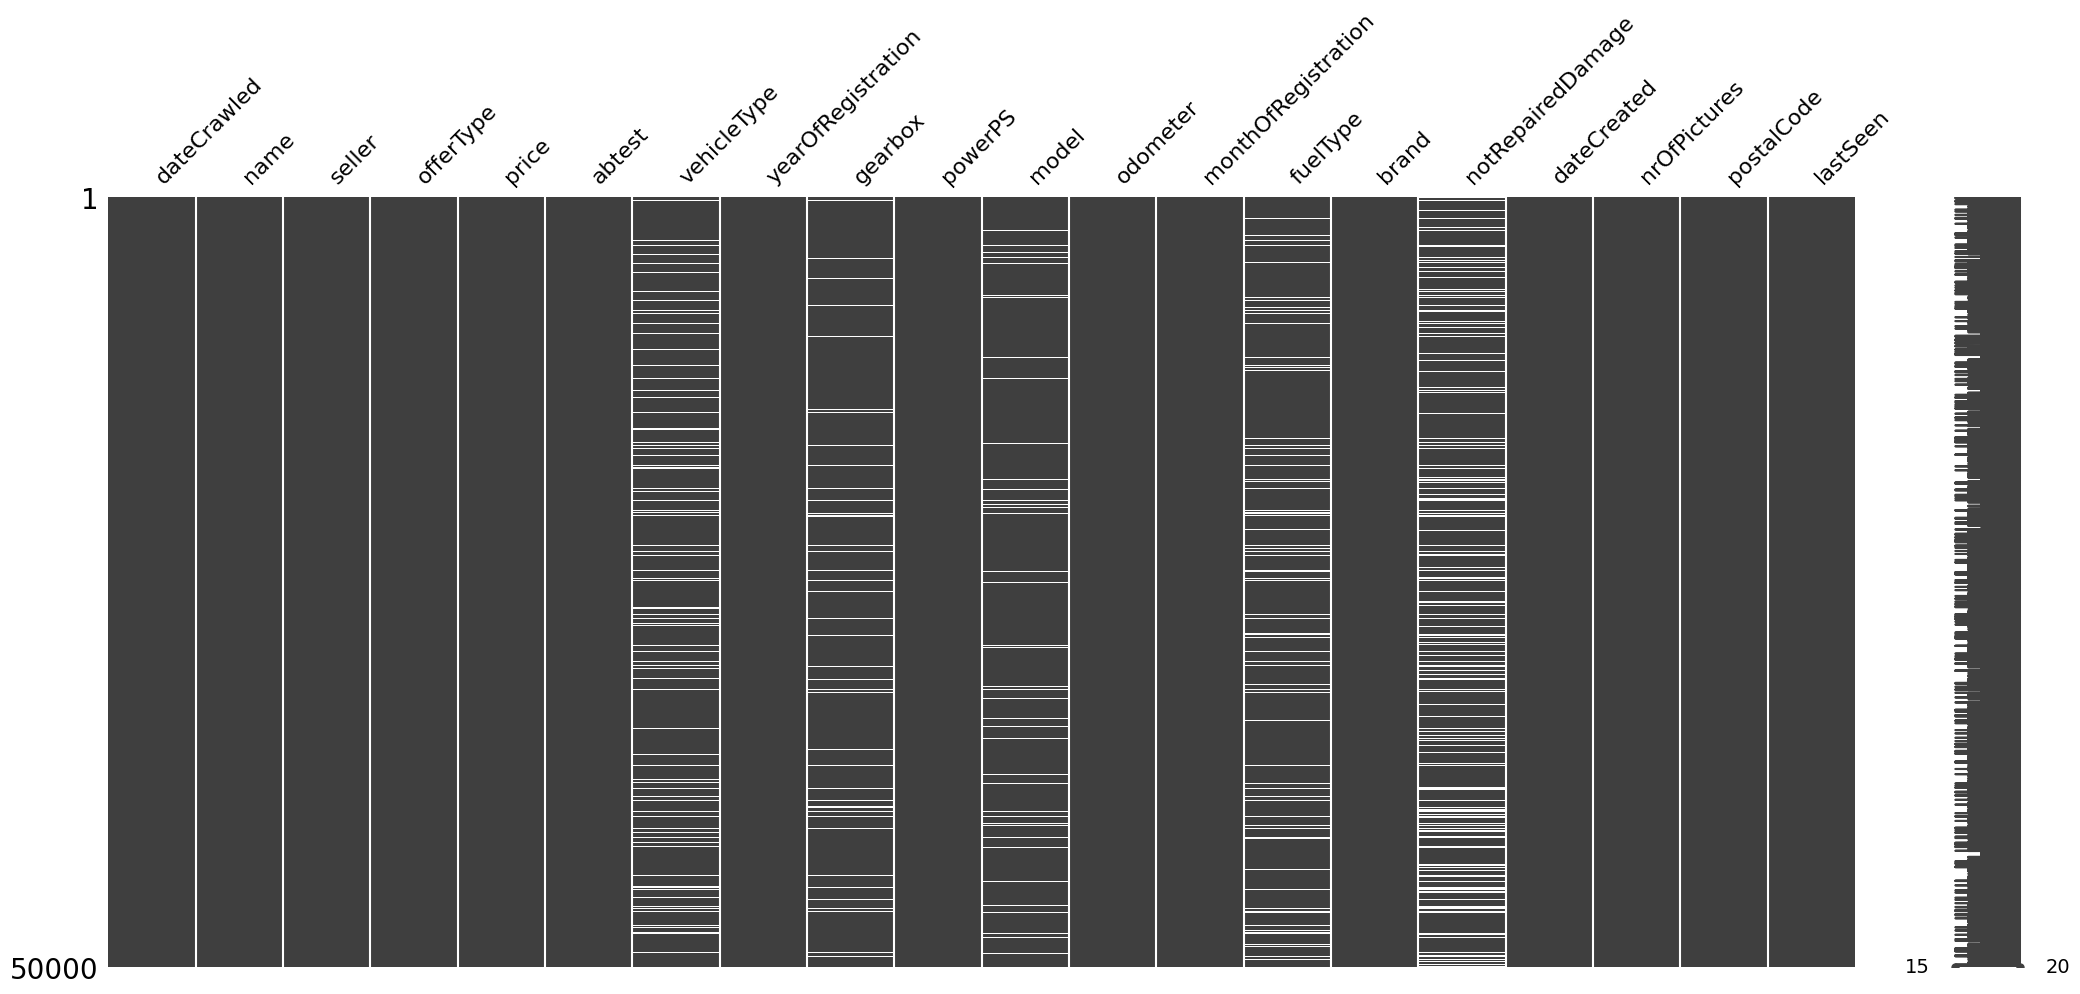

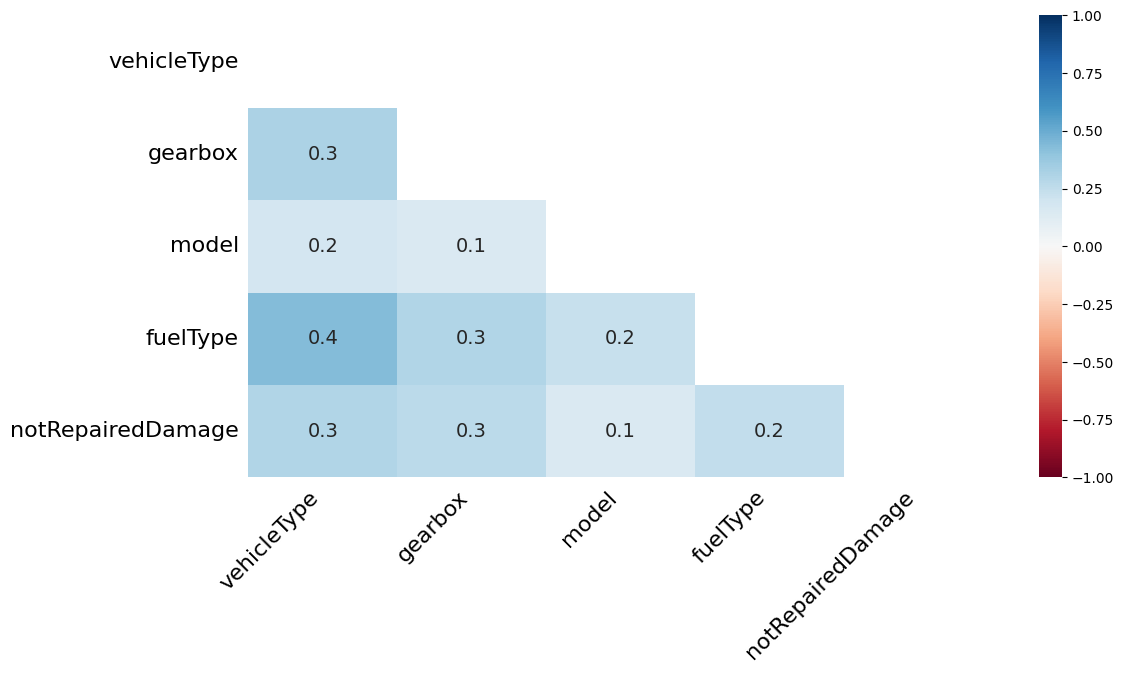

In [ ]:
missing_value_graph()

In [ ]:
#Removes all rows with null values
def remove_Null_rows():
    df = df.dropna(axis=0, how='any')

In [ ]:
def get_numerical_columns(df):
    """
        A list of column names containing numerical data.
    """
    numerical_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
    return numerical_cols

In [ ]:
def get_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_columns.append(col)
    return categorical_columns


get_categorical_columns(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'odometer',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen']

# Data Cleaning and Imputation

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 50000  │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ yearOfRegistration       │   0 │      0 │    2000 │     110 │  1000 │    2000 │   2000 │   10000 │    █    │  │
│ │ powerPS                  │   0 │      0 │     120 │     210 │     0 │      70 │    150 │   18000 │    █    │  │
│ │ monthOfRegistration      │   0 │      0 │     5.7 │     3.7 │     0 │       3 │      9 │      12 │ ▆▆▆▆▅█  │  │
│ │ nrOfPictures             │   0 │      0 │       0 │       0 │     0 │       0 │      0 │       0 │     █   │  │
│ │ postalCode               │   0 │      0 │   51000 │   26000 │  1100 │   30000 │  72000 │  100000 │ ▄▇██▅▆  │  │
│ └──────────────────────────┴─────┴────────┴─────────┴─────────┴───────┴─────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ dateCrawled                      │         0 │         0 │                        2 │               100000 │  │
│ │ name                             │         0 │         0 │                        2 │               100000 │  │
│ │ seller                           │         0 │         0 │                        2 │               100000 │  │
│ │ offerType                        │         0 │         0 │                        2 │               100000 │  │
│ │ price                            │         0 │         0 │                        2 │               100000 │  │
│ │ abtest                           │         0 │         0 │                        2 │               100000 │  │
│ │ vehicleType                      │      5100 │        10 │                        2 │               100000 │  │
│ │ gearbox                          │      2700 │       5.4 │                        2 │               100000 │  │
│ │ model                            │      2800 │       5.5 │                        2 │               100000 │  │
│ │ odometer                         │         0 │         0 │                        2 │               100000 │  │
│ │ fuelType                         │      4500 │         9 │                        2 │               100000 │  │
│ │ brand                            │         0 │         0 │                        2 │               100000 │  │
│ │ notRepairedDamage                │      9800 │      

### Data Cleaning

From the data description above, we find out that the price and odometer columns are numeric values stored as text. For each column, we will:

Remove any non-numeric characters.
Convert the column to a numeric data type.

In [ ]:
df["odometer"] = df["odometer"].str.replace(',', '').str.replace('km', '').astype(float)
df["price"] = df["price"].str.replace(',','').str.replace('$','').astype(float)
df.rename({"odometer":"odometer_km"}, axis=1, inplace=True)

<ipython-input-15-e8b69fe1c7a4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace(',','').str.replace('$','').astype(float)


Fixing year column as it has invalid max and min values, removing those rows that has invalid value

In [ ]:
# Define the valid range of years
min_year = 1930
max_year = 2020

# Filter out the rows with values outside the valid range
df = df[(df['yearOfRegistration'] >= min_year) & (df['yearOfRegistration'] <= max_year)]

# Reset the index if needed
df = df.reset_index(drop=True)

In [ ]:
 df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer_km,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Exploring categorical columns with value counts and cleaning them

In [ ]:
df['seller'].value_counts()

privat        49964
gewerblich        1
Name: seller, dtype: int64

Dropping seller as it has one value in all rows except one row hence it is irrelevant for our analysis, so we are dropping it.

In [ ]:
df.drop('seller', axis=1, inplace=True)

In [ ]:
df['offerType'].value_counts()

Angebot    49964
Gesuch         1
Name: offerType, dtype: int64

Dropping offerType as it has one value in all rows except one row henc irrelevant for our analysis, so we are dropping it.

In [ ]:
df.drop('offerType', axis=1, inplace=True)

Dropping nrOfPictures column as it is not useful for our analysis

In [ ]:
df.drop('nrOfPictures', axis=1, inplace=True)

In [ ]:
df['abtest'].value_counts()

test       25736
control    24229
Name: abtest, dtype: int64

In [ ]:
df['vehicleType'].value_counts()

limousine     12859
kleinwagen    10820
kombi          9127
bus            4093
cabrio         3059
coupe          2537
suv            1986
andere          420
Name: vehicleType, dtype: int64

Converting vehicleType column values to english from german so it will be easier for our analysis

In [ ]:
# Dictionary mapping German vehicle types to English equivalents
german_to_english = {
    'limousine': 'limousine',
    'kleinwagen': 'small car',
    'kombi': 'station wagon',
    'bus': 'bus',
    'cabrio': 'convertible',
    'coupe': 'coupe',
    'suv': 'suv',
    'andere': 'other'
}

# Convert German values to English in the vehicleType column
df['vehicleType'] = df['vehicleType'].map(german_to_english)


In [ ]:
df['gearbox'].value_counts()

manuell      36985
automatik    10323
Name: gearbox, dtype: int64

Converting gearbox column values to english from german so it will be easier for our analysis

In [ ]:
# Dictionary mapping German to English equivalents
german_to_english = {
    'manuell': 'manual',
    'automatik': 'automatic',
}

# Convert German values to English in the column
df['gearbox'] = df['gearbox'].map(german_to_english)


In [ ]:
df['fuelType'].value_counts()

benzin     30098
diesel     14566
lpg          691
cng           75
hybrid        37
andere        21
elektro       19
Name: fuelType, dtype: int64

Converting fuelType column values to english from german so it will be easier for our analysis

In [ ]:
# Dictionary mapping German fuel types to English equivalents
german_to_english = {
    'benzin': 'petrol',
    'diesel': 'diesel',
    'lpg': 'LPG',
    'cng': 'CNG',
    'hybrid': 'hybrid',
    'elektro': 'electric',
    'andere': 'other'
}

# Convert German values to English in the fuelType column
df['fuelType'] = df['fuelType'].map(german_to_english)

In [ ]:
df['notRepairedDamage'].value_counts()

nein    35227
ja       4938
Name: notRepairedDamage, dtype: int64

Converting notRepairedDamage column values to english from german so it will be easier for our analysis

In [ ]:
# Dictionary mapping German to English equivalents
german_to_english = {
    'nein': 'no',
    'ja': 'yes',
}

# Convert German values to English in the column
df['notRepairedDamage'] = df['notRepairedDamage'].map(german_to_english)

In [ ]:
df['brand'].value_counts()

volkswagen        10682
opel               5456
bmw                5427
mercedes_benz      4732
audi               4283
ford               3478
renault            2403
peugeot            1456
fiat               1308
seat                940
skoda               785
mazda               757
nissan              754
smart               701
citroen             700
toyota              617
sonstige_autos      537
hyundai             488
volvo               457
mini                424
mitsubishi          404
honda               399
kia                 356
alfa_romeo          329
porsche             294
suzuki              293
chevrolet           283
chrysler            181
dacia               129
daihatsu            128
jeep                109
subaru              108
land_rover           99
saab                 79
daewoo               79
jaguar               77
trabant              76
rover                69
lancia               57
lada                 31
Name: brand, dtype: int64

Renaming columns that will help stakeholders to understand visuals better

In [ ]:
# Define a dictionary to map camel case column names to underscore casing
camel_to_underscore = {
    'dateCrawled': 'Date_crawled',
    'vehicleType': 'Vehicle_type',
    'yearOfRegistration': 'Year_of_registration',
    'powerPS': 'Power_ps',
    'monthOfRegistration': 'Month_of_registration',
    'fuelType': 'Fuel_type',
    'notRepairedDamage': 'Not_repaired_damage',
    'dateCreated': 'Date_created',
    'postalCode': 'Postal_code',
    'lastSeen': 'Last_seen'
}

# Rename columns from camel case to underscore casing
df.rename(columns=camel_to_underscore, inplace=True)

# Example result
print(df.columns)


Index(['Date_crawled', 'name', 'price', 'abtest', 'Vehicle_type',
       'Year_of_registration', 'gearbox', 'Power_ps', 'model', 'odometer_km',
       'Month_of_registration', 'Fuel_type', 'brand', 'Not_repaired_damage',
       'Date_created', 'Postal_code', 'Last_seen'],
      dtype='object')


In [ ]:
df.head()

,Date_crawled,name,price,abtest,Vehicle_type,Year_of_registration,gearbox,Power_ps,model,odometer_km,Month_of_registration,Fuel_type,brand,Not_repaired_damage,Date_created,Postal_code,Last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manual,158,andere,150000.0,3,LPG,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,small car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,station wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


### Imputation

Imputing Not_repaired_damage based upon categorizing odometer_km, Year_of_registration and price, taking mode for filling null values

In [ ]:
# Group the data based on the relevant variables and calculate the mode of 'Not_repaired_damage'
grouped = df.groupby(['odometer_km', 'Year_of_registration', 'price'])['Not_repaired_damage'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None).reset_index()


# Merge the grouped data with the original DataFrame to impute missing values
df = pd.merge(df, grouped, on=['odometer_km', 'Year_of_registration', 'price'], how='left', suffixes=('', '_imputed'))

# Replace missing values in 'Not_repaired_damage' with the imputed values
df['Not_repaired_damage'].fillna(df['Not_repaired_damage_imputed'], inplace=True)
df.drop('Not_repaired_damage_imputed', axis=1, inplace=True)

# Example result
print(df['Not_repaired_damage'].value_counts())

no     41444
yes     5781
Name: Not_repaired_damage, dtype: int64


Imputing Vehicle_type based upon categorizing brand and model, taking mode for filling null values

In [ ]:
# Group by brand and model, and calculate the mode of vehicleType within each group
grouped = df.groupby(['brand', 'model'])['Vehicle_type'].apply(lambda x: x.mode()[0] if x.notnull().any() else None).reset_index()

# Merge the grouped data back into the original DataFrame
df = pd.merge(df, grouped, on=['brand', 'model'], how='left', suffixes=['', '_imputed'])

# Impute missing values in vehicleType column with the values from the mode calculation
df['Vehicle_type'].fillna(df['Vehicle_type_imputed'], inplace=True)

# Drop the intermediate column used for imputation
df.drop('Vehicle_type_imputed', axis=1, inplace=True)

# Example result
print(df['Vehicle_type'].value_counts())


limousine        14569
small car        12129
station wagon     9601
bus               4556
convertible       3091
coupe             2637
suv               2062
other              429
Name: Vehicle_type, dtype: int64


Imputing Fuel_type based upon categorizing brand, model and Vehicle_type, taking mode for filling null values

In [ ]:
# Group by vehicleType and brand, and calculate the mode of fuelType within each group
grouped = df.groupby(['Vehicle_type', 'brand','model'])['Fuel_type'].apply(lambda x: x.mode()[0] if x.notnull().any() else None).reset_index()

# Merge the grouped data back into the original DataFrame
df = pd.merge(df, grouped, on=['Vehicle_type', 'brand','model'], how='left', suffixes=['', '_imputed'])

# Impute missing values in fuelType column with the values from the mode calculation
df['Fuel_type'].fillna(df['Fuel_type_imputed'], inplace=True)

# Drop the intermediate column used for imputation
df.drop('Fuel_type_imputed', axis=1, inplace=True)

# Example result
print(df['Fuel_type'].value_counts())


petrol      32829
diesel      15293
LPG           691
CNG            75
hybrid         37
other          21
electric       19
Name: Fuel_type, dtype: int64


Imputing model based upon categorizing brand, Year_of_registration, Power_ps and Vehicle_type, taking mode for filling null values

In [ ]:
# Define a function to impute the missing model values based on the combination of attributes
def impute_model(row):
    brand = row['brand']
    vehicle_type = row['Vehicle_type']
    year = row['Year_of_registration']
    power = row['Power_ps']

    # Find rows with matching brand, vehicle type, year, and power
    matching_rows = df[(df['brand'] == brand) & (df['Vehicle_type'] == vehicle_type) & 
                       (df['Year_of_registration'] == year) & (df['Power_ps'] == power)]

    if not matching_rows.empty:
        # Get the mode value(s) of the 'model' column
        mode_values = matching_rows['model'].mode()

        if len(mode_values) > 0:
            # If mode exists, return the first mode value
            most_common_model = mode_values.iloc[0]
            return most_common_model

    # If no matching rows found or mode does not exist, return NaN or a default value
    return None  # or 'Unknown' or any other suitable value

# Apply the imputation function to fill the missing values in the 'model' column
df['model'] = df.apply(lambda row: impute_model(row) if pd.isnull(row['model']) else row['model'], axis=1)

# Example result
print(df['model'].value_counts())

golf          4143
andere        3581
3er           2864
polo          1818
corsa         1769
              ... 
kappa            2
rangerover       1
i3               1
200              1
b_max            1
Name: model, Length: 245, dtype: int64


Imputing gearbox based upon categorizing brand, model, Year_of_registration and Vehicle_type, taking mode for filling null values

In [ ]:
# Group the data by brand, model, and Vehicle_type, and calculate the mode of gearbox within each group
grouped = df.groupby(['brand', 'model', 'Vehicle_type'])['gearbox'].apply(lambda x: x.mode()[0] if x.notnull().any() else None).reset_index()

# Merge the grouped data back into the original DataFrame
df = pd.merge(df, grouped, on=['brand', 'model', 'Vehicle_type'], how='left', suffixes=['', '_imputed'])

# Calculate the number of years since registration
current_year = pd.Timestamp.now().year
df['years_since_registration'] = current_year - df['Year_of_registration']

# Impute missing values in the gearbox column with the mode values from the group
df['gearbox'].fillna(df['gearbox_imputed'], inplace=True)

# Drop the intermediate columns used for imputation
df.drop(['gearbox_imputed', 'years_since_registration'], axis=1, inplace=True)

# Example result
print(df['gearbox'].value_counts())


manual       38910
automatic    10582
Name: gearbox, dtype: int64


Imputating all remaining null values as unknown rather than dropping them so they can useful for analysis

In [ ]:
# Label all null values as 'Unknown'
df = df.fillna('Unknown')


In [ ]:
missing_value_count_and_percentage()

,Missing Value Count,Missing Value Percentage
Date_crawled,0,0.0
odometer_km,0,0.0
Postal_code,0,0.0
Date_created,0,0.0
Not_repaired_damage,0,0.0
brand,0,0.0
Fuel_type,0,0.0
Month_of_registration,0,0.0
model,0,0.0
name,0,0.0


In [ ]:
dataset_describe()

There are 49965 rows and 17 columns in the dataset.

Columns with their Data Types: 
Date_crawled              object
name                      object
price                    float64
abtest                    object
Vehicle_type              object
Year_of_registration       int64
gearbox                   object
Power_ps                   int64
model                     object
odometer_km              float64
Month_of_registration      int64
Fuel_type                 object
brand                     object
Not_repaired_damage       object
Date_created              object
Postal_code                int64
Last_seen                 object
dtype: object



### Output Cleansed File

In [ ]:
df.to_excel("Cleaned_Ebay_Car_Sales_Data.xlsx")

# Single Variate Analysis

## Numerical Columns Analysis

In [ ]:
from scipy.stats import normaltest, shapiro, anderson

def check_normality(data):
    # Check normality using D'Agostino-Pearson's omnibus test
    k2_stat, k2_pval = normaltest(data)
    k2_normal = k2_pval >= 0.05
    
    # Check normality using Shapiro-Wilk test
    sw_stat, sw_pval = shapiro(data)
    sw_normal = sw_pval >= 0.05
    
    # Check normality using Anderson-Darling test
    ad_stat, ad_critical_values, _ = anderson(data, dist='norm')
    ad_normal = ad_stat < ad_critical_values[2]
    
    # Return True if all tests indicate normality, False otherwise
    if k2_normal and sw_normal and ad_normal:
        return f"passes normality test"
    else:
        return f"does not pass normality test"


In [ ]:
numerical_cols = get_numerical_columns(df)
# Iterate over the numerical columns
for i, variable in enumerate(numerical_cols):
    
    print("Column: ", variable)
    # Check normality
    normality_result = check_normality(df[variable])
    print("Test: ", normality_result)

Column:  price
Test:  does not pass normality test
Column:  Year_of_registration
Test:  does not pass normality test
Column:  Power_ps
Test:  does not pass normality test
Column:  odometer_km
Test:  does not pass normality test
Column:  Month_of_registration
Test:  does not pass normality test
Column:  Postal_code
Test:  does not pass normality test


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Statistical summary for numerical columns

In [ ]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10896.0,6868.548183,107827.460352,0.0,1100.0,2950.0,7300.0,11111111.0
Year_of_registration,10896.0,2003.374266,7.493964,1934.0,1999.0,2003.0,2008.0,2019.0
Power_ps,10896.0,115.662078,121.972728,0.0,72.0,107.0,150.0,6512.0
odometer_km,10896.0,125867.749633,39973.913507,5000.0,125000.0,150000.0,150000.0,150000.0
Month_of_registration,10896.0,5.779093,3.707444,0.0,3.0,6.0,9.0,12.0
Postal_code,10896.0,50387.622981,25689.322490,1067.0,29690.0,49163.0,70839.0,99994.0


### Histogram plots for numerical columns

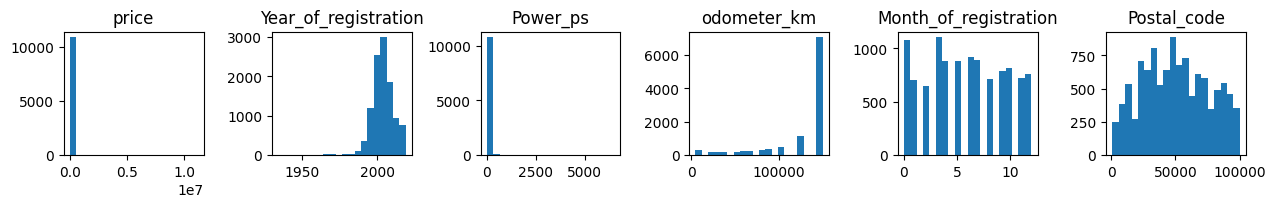

In [ ]:
numerical_cols = get_numerical_columns(df)
# Set the size of the figure
plt.figure(figsize=(21, 18))

# Iterate over the numerical columns and create histogram plots
for i, variable in enumerate(numerical_cols):
    plt.subplot(10, 10, i + 1)
    plt.hist(df[variable], bins=20)  # Adjust the number of bins as needed
    plt.tight_layout()
    plt.title(variable)

plt.show()

Price column is highly right skewed.

Year_of_regtration column is left skewed.

Power_ps column is highly right skewed.

odometer_km column is left skewed.

Month_of_Registration column is very slightly right skewed.

Postal_code column is sort of uniformly distrbuted.

### Outlier Detection for numerical columns

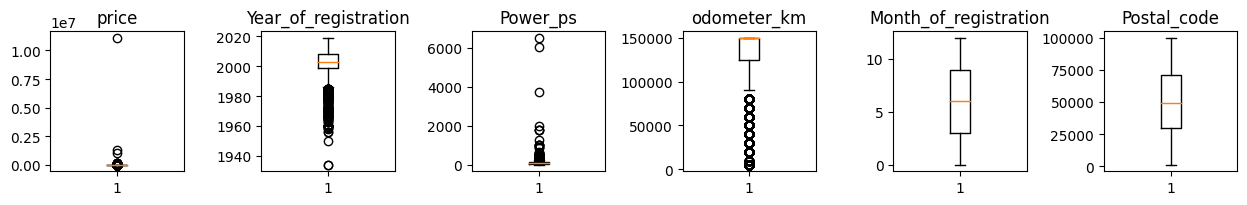

In [ ]:
# outlier detection using boxplot
numerical_cols = get_numerical_columns(df)
# dropping release_year as it is a temporal variable
# numeric_columns.remove("y")

plt.figure(figsize=(21, 18))
for i, variable in enumerate(numerical_cols):
    plt.subplot(10, 10, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()

In Price column there are a few extreme values or outliers with very high prices.

In Year_of_Registration the presence of outliers with very low registration years. Outliers values are significantly lower than the majority of registration years.

In Power_ps column the presence of outliers with very high power values. Outliers in this case would be values significantly higher than the majority of power values.

In Odometer_km column the presence of outliers with very low odometer readings. Outliers here are values significantly lower than the majority of odometer readings.

In Month_of_Registration column the presence of outliers in this column be negligible.

In Postal_code column the presence of outliers in this column be negligible.

## Categorical Column Analysis

### labeled Histogram Plots for categorical columns 

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

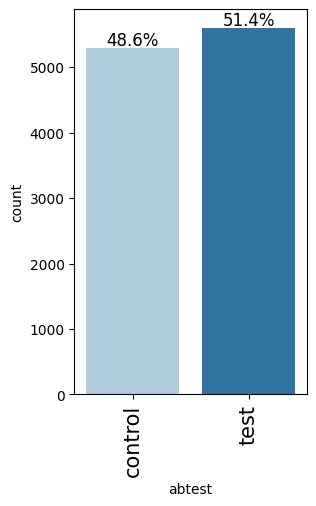

In [ ]:
labeled_barplot(df, "abtest", perc=True)

The abtest column shows 2 types of values.

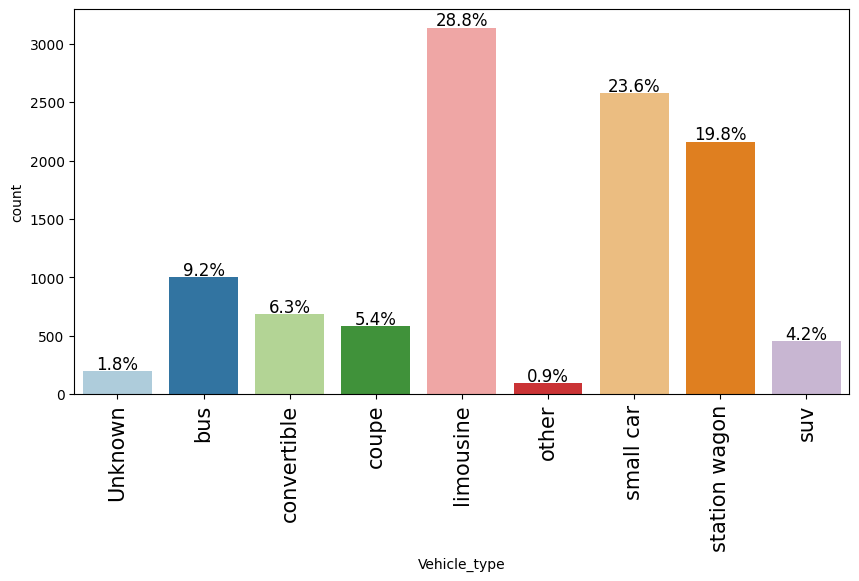

In [ ]:
labeled_barplot(df, "Vehicle_type", perc=True)

The Vehicle_type column shows 9 types of values.

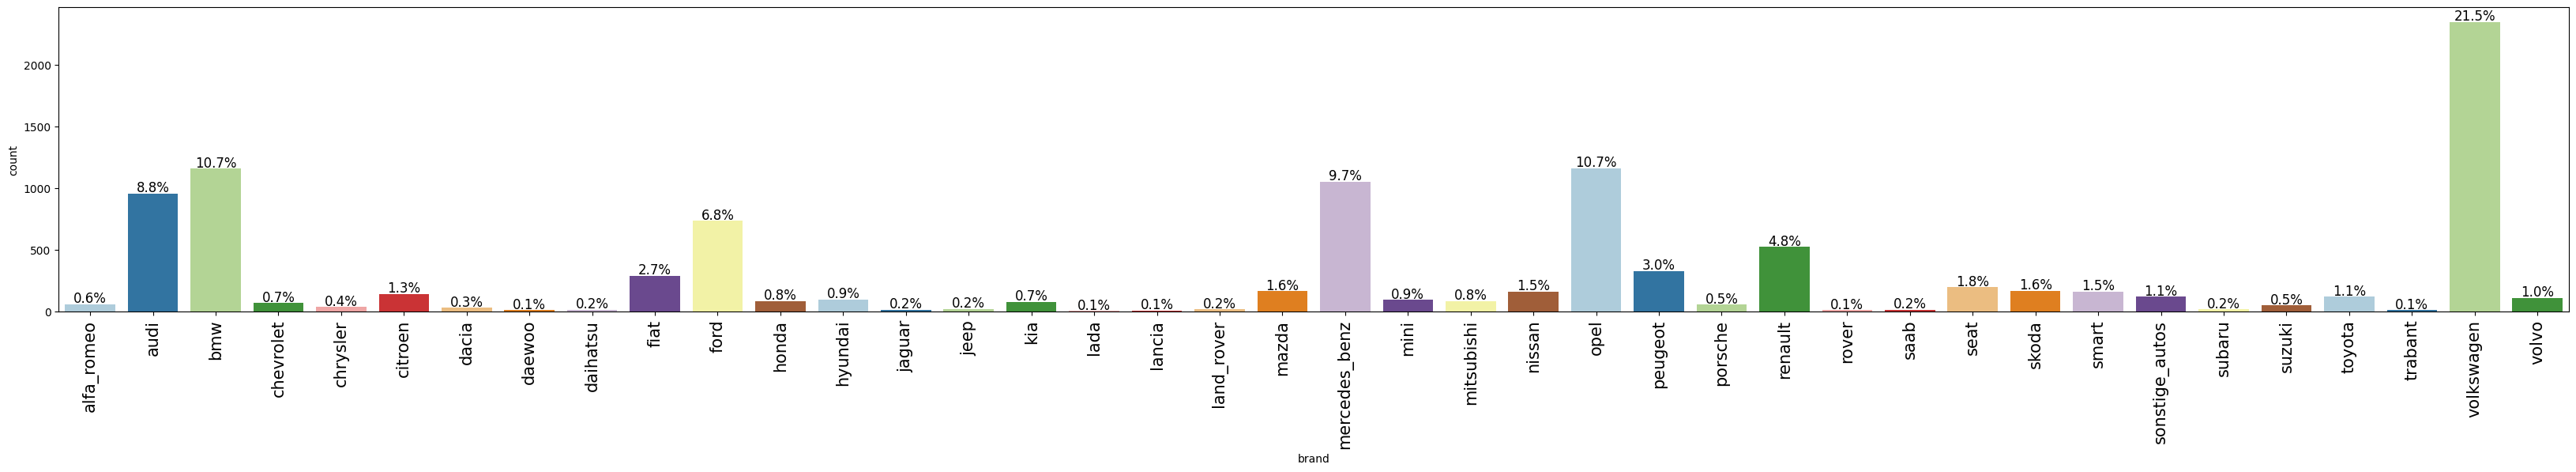

In [ ]:
labeled_barplot(df, "brand", perc=True)

The brand column shows 40 types of values.

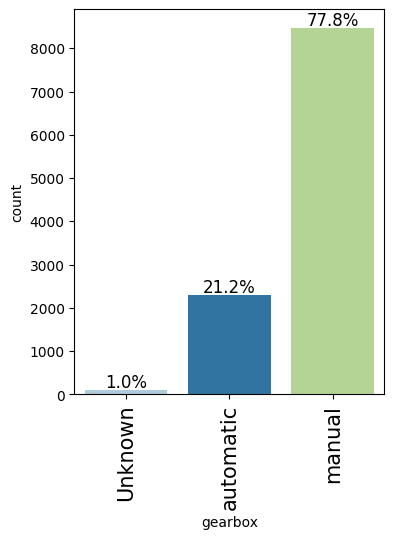

In [ ]:
labeled_barplot(df, "gearbox", perc=True)

The gearbox column shows 40 types of values.

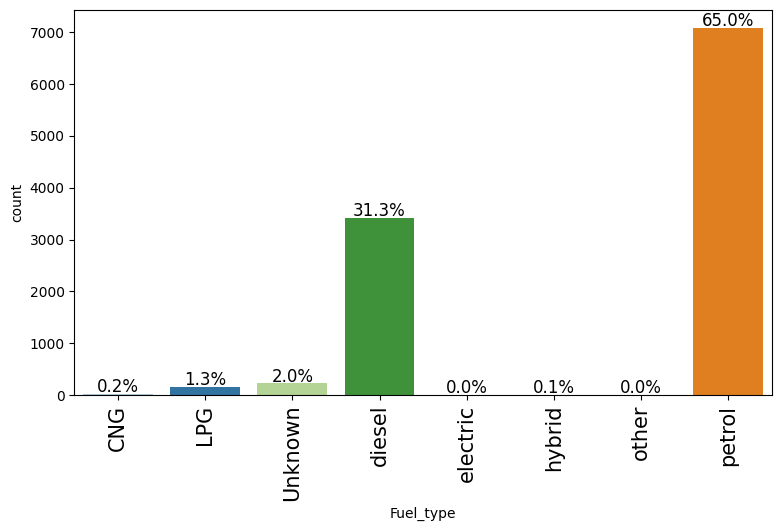

In [ ]:
labeled_barplot(df, "Fuel_type", perc=True)

The Fuel_type column shows 40 types of values.

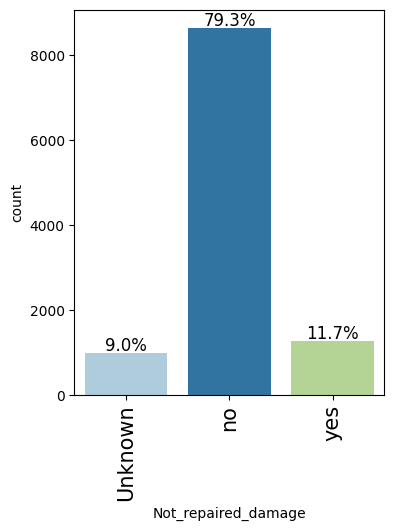

In [ ]:
labeled_barplot(df, "Not_repaired_damage", perc=True)

The Not_repaired_damage column shows 3 types of values.

# Bivariate Analysis

In [ ]:
def plot_corr_heatmap():
    # Calculate the correlation matrix for all columns
    corr_matrix = df.corr()

    # Create a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    # Show the plot
    plt.show()


<ipython-input-55-9aa6bb4f12d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


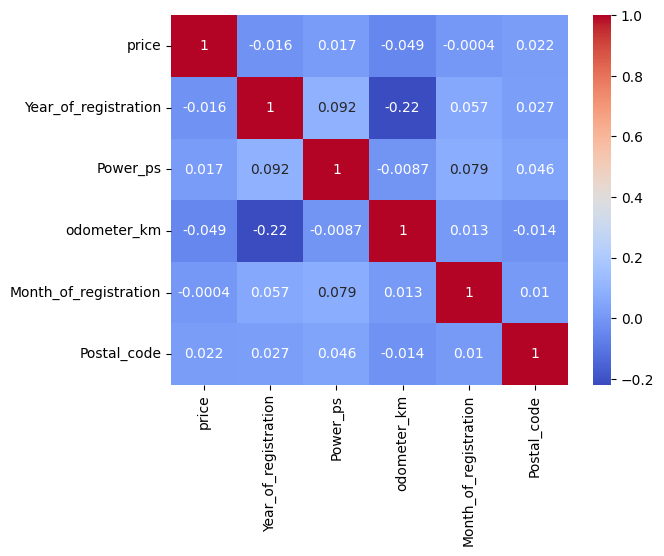

In [ ]:
plot_corr_heatmap()

Significant relations in above heatmap:

The Year_of_registration is negatively correlated with odometer_km.

The Year_of_registration is positively correlated with power_ps.

In [ ]:
def plot_scatter_matrix():
    # Create a scatter plot matrix for all columns
    sns.pairplot(df)

    # Show the plot
    plt.show()

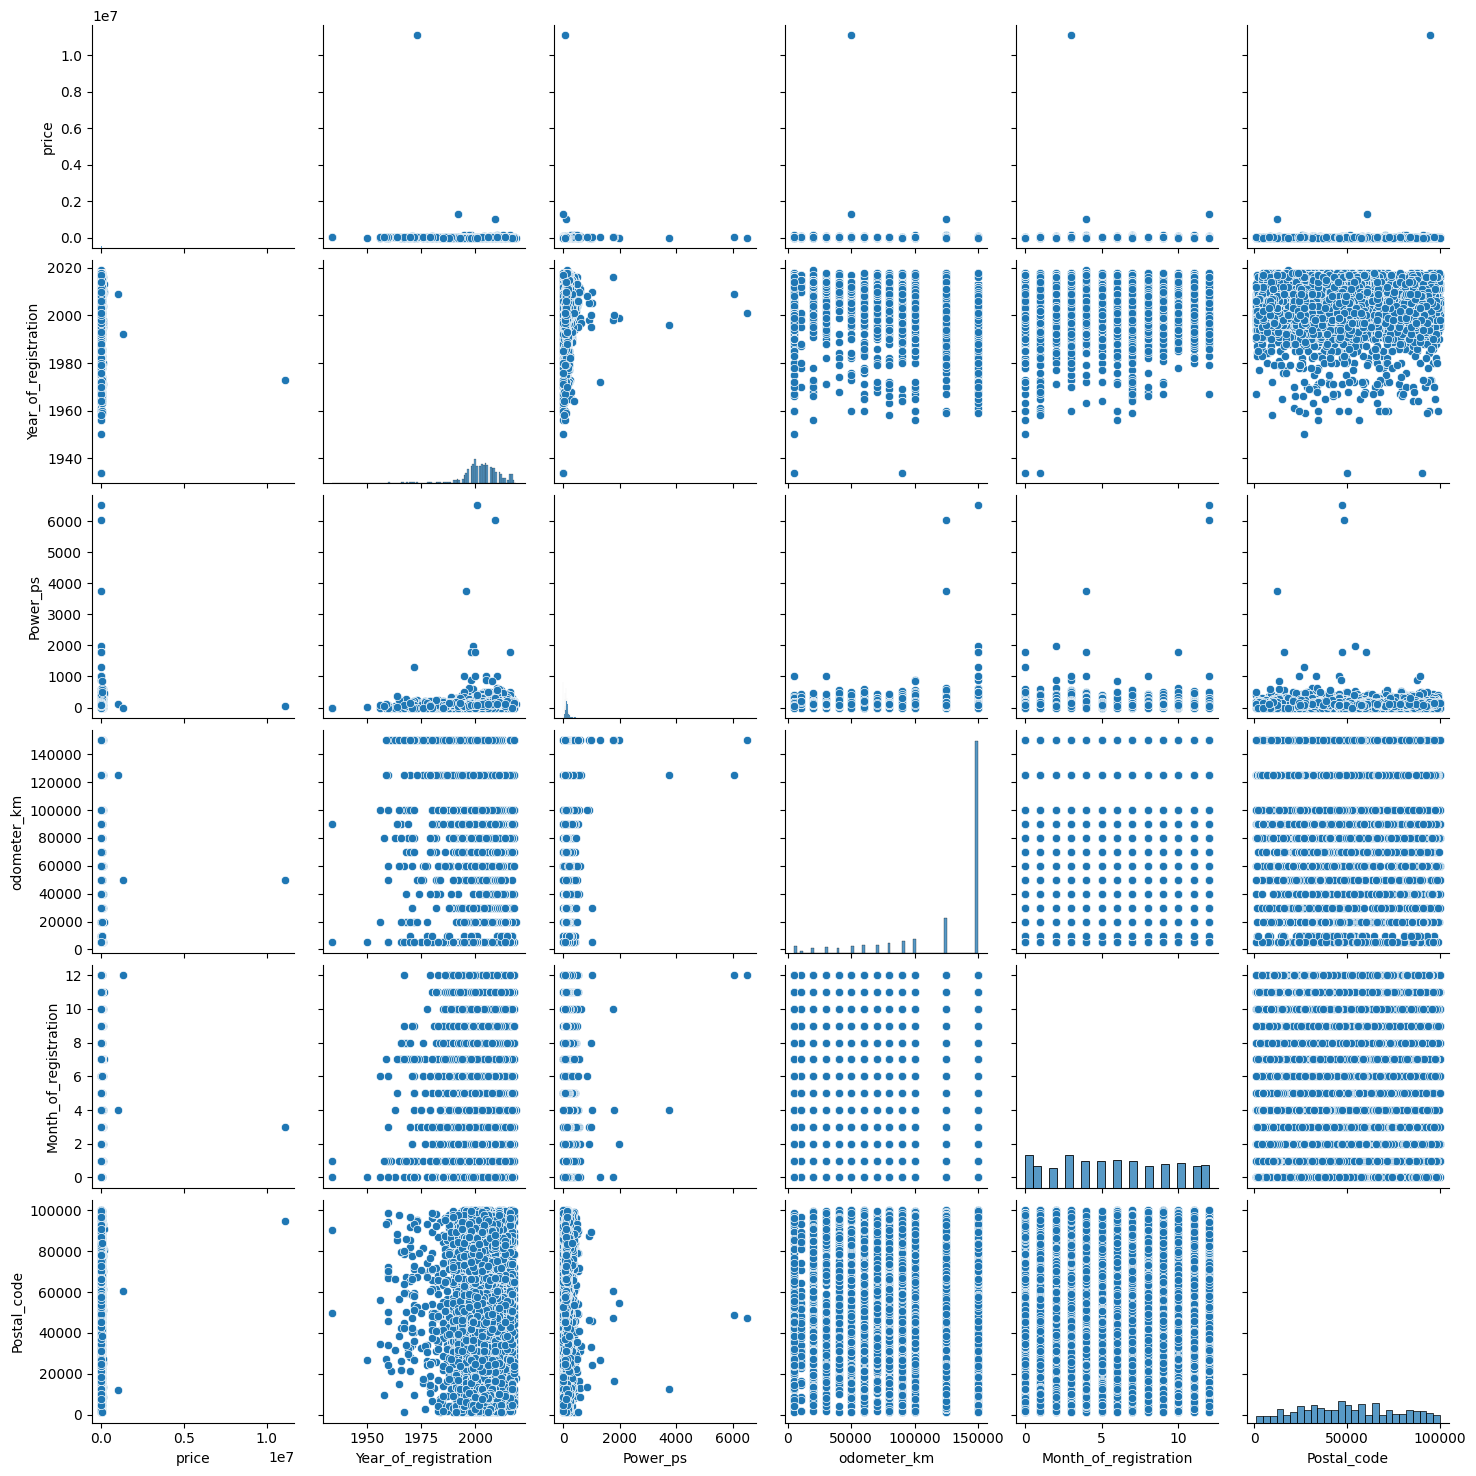

In [ ]:
plot_scatter_matrix()

Price does not have any significant correlation with any of these variables.

yearOfRegistration and powerPS have a positive correlation of 0.67. This means that as the year of registration increases, the power PS also tends to increase.

monthOfRegistration and powerPS have a weak positive correlation of 0.23. This means that there is a slight tendency for the power PS to increase as the month of registration increases.

postalCode and powerPS have no correlation. This means that the postal code does not affect the power PS.

postalCode and yearOfRegistration have low negative correlation.

### Anova Test

In [ ]:
from scipy.stats import f_oneway

def anova_test(df, cat_cols, numerical_cols):
    results = {}
    for cat_col in cat_cols:
        for num_col in numerical_cols:
            groups = []
            for group_name, group_data in df.groupby(cat_col):
                groups.append(group_data[num_col])
            p_value = f_oneway(*groups)[1]
            results[f"{num_col} and {cat_col}"] = p_value
    
    return results


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

def format_anova_results(results):
    # Create an empty DataFrame
    df_results = pd.DataFrame(columns=['Numerical Column', 'Categorical Column', 'p-value'])

    # Loop over the results dictionary and populate the DataFrame
    for key, val in results.items():
        num_col, cat_col = key.split(' and ')
        p_value = val
        df_results = df_results.append({'Numerical Column': num_col, 'Categorical Column': cat_col, 'p-value': p_value},
                                       ignore_index=True)

    # Format the DataFrame
    df_results['p-value'] = df_results['p-value'].apply(lambda x: f"{x:.4f}")

    # Return the formatted DataFrame
    return df_results

# Define the list of categorical and numerical columns
numerical_cols = get_numerical_columns(df)
cat_cols = get_categorical_columns(df)


# Call the ANOVA test function
anova_results = anova_test(df, cat_cols, numerical_cols)

# Convert the results into a beautiful table
formatted_results = format_anova_results(anova_results)

# Print the formatted table
print(formatted_results)

         Numerical Column Categorical Column p-value
0                   price       Date_crawled  0.0000
1    Year_of_registration       Date_crawled  0.8588
2                Power_ps       Date_crawled  0.0000
3             odometer_km       Date_crawled  0.4959
4   Month_of_registration       Date_crawled  0.1540
..                    ...                ...     ...
61   Year_of_registration          Last_seen  0.9909
62               Power_ps          Last_seen  1.0000
63            odometer_km          Last_seen  0.9970
64  Month_of_registration          Last_seen  0.7243
65            Postal_code          Last_seen  0.9876

[66 rows x 3 columns]


<ipython-input-61-cfd74f44e020>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Numerical Column': num_col, 'Categorical Column': cat_col, 'p-value': p_value},
<ipython-input-61-cfd74f44e020>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Numerical Column': num_col, 'Categorical Column': cat_col, 'p-value': p_value},
<ipython-input-61-cfd74f44e020>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Numerical Column': num_col, 'Categorical Column': cat_col, 'p-value': p_value},
<ipython-input-61-cfd74f44e020>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the formatted table with proper column headers and values
print("ANOVA Results:")
display(formatted_results)

ANOVA Results:


,Numerical Column,Categorical Column,p-value
0,price,Date_crawled,0.0000
1,Year_of_registration,Date_crawled,0.8588
2,Power_ps,Date_crawled,0.0000
3,odometer_km,Date_crawled,0.4959
4,Month_of_registration,Date_crawled,0.1540
5,Postal_code,Date_crawled,0.7298
6,price,name,0.0000
7,Year_of_registration,name,0.0000
8,Power_ps,name,0.0000
9,odometer_km,name,0.0000


### ANOVA result explanation

p-values below 0.05:

Year_of_registration and brand: The p-value is 0.0000, indicating a significant difference in Year_of_registration based on the brand.

Postal_code and brand: The p-value is 0.0000, suggesting a significant difference in Postal_code based on the brand.

Year_of_registration and Not_repaired_damage: The p-value is 0.0000, indicating a significant difference in Year_of_registration based on the Not_repaired_damage.

Power_ps and Not_repaired_damage: The p-value is 0.0000, suggesting a significant difference in Power_ps based on the Not_repaired_damage.

odometer_km and Not_repaired_damage: The p-value is 0.0000, indicating a significant difference in odometer_km based on the Not_repaired_damage.

Month_of_registration and Not_repaired_damage: The p-value is 0.0000, suggesting a significant difference in Month_of_registration based on the Not_repaired_damage.

p-values above 0.05:

Year_of_registration and abtest: The p-value is 0.9526, indicating no significant difference in Year_of_registration based on the abtest.

Power_ps and abtest: The p-value is 0.1930, suggesting no significant difference in Power_ps based on the abtest.

odometer_km and abtest: The p-value is 0.4501, indicating no significant difference in odometer_km based on the abtest.

Month_of_registration and abtest: The p-value is 0.0799, suggesting no significant difference in Month_of_registration based on the abtest.

Postal_code and abtest: The p-value is 0.4578, indicating no significant difference in Postal_code based on the abtest.

price and Vehicle_type: The p-value is 0.2773, suggesting no significant difference in price based on the Vehicle_type.

Postal_code and gearbox: The p-value is 0.1024, indicating no significant difference in Postal_code based on the gearbox.

Postal_code and Not_repaired_damage: The p-value is 0.0523, suggesting no significant difference in Postal_code based on the Not_repaired_damage.